<a href="https://colab.research.google.com/github/ofgkts/Portfolio-Projects/blob/main/survey_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#2023 3'rd quarter Turkiye Software engineers salary survey
purpose of this notebook is cleaning and analyzing data before tableu i take this data from https://twitter.com/AltugAkgul/status/1687848297329790976?s=20  

In [1]:
#importing necessary librarires for the starting
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
survey=pd.read_csv('/content/drive/MyDrive/proje/Omer Code/projects/cs_survey/2023_II_-_Yazılım_Sektörü_M2023-08-05_11_01_23.csv')
df=survey.copy()
df.head()

,Submission Date,Cinsiyet,Yan haklarınız,Şirketiniz hangi lokasyon merkezli?,Şirketiniz hangi şehirde? (Eğer Türkiye ise),Çalışma şekliniz nedir?,Şirketinizin çalışan sayısı nedir?,Hangi pozisyonda çalışıyorsunuz?,Seviyeniz nedir?,Deneyim,Ağırlıklı olarak hangi teknolojileri / dilleri kullanıyorsunuz?,Kazancınız hangi para biriminde?,Maaş tipi,Ara zam / iyileştirme aldıysanız oranı hangi aralıkta?,Maaş / Aylık Türk Lirası cinsinden
0,"Ağu 5, 2023",Erkek,Yemek kartı\nYol / yakıt yardımı\nPersonel ser...,Türkiye,34 İstanbul,Hybrid,601-1.000,DevOps,Senior,5-9 Yıl,"C# / .NET Framework\nCloud araçları ( AWS, Azu...",Türk Lirası,Net,%21-%35,70.001 TL - 85.000 TL
1,"Ağu 5, 2023",Erkek,Yemek kartı\nTamamlayıcı sağlık sigortası\nBel...,Türkiye,34 İstanbul,Remote,51-150,Fullstack Developer / Engineer,Junior,0-1 Yıl,Java ve bağlı framework'ler\nJavascript / Type...,Türk Lirası,Net,%11-%20,20.001 TL - 25.000 TL
2,"Ağu 5, 2023",Erkek,Yemek kartı\nPersonel servisi,Türkiye,34 İstanbul,Ofiste,1.000-5.000,Diğer,Junior,0-1 Yıl,"ChatGPT\nCloud araçları ( AWS, Azure, GCP vs)\...",Türk Lirası,Net,%21-%35,11.402 TL ve altı
3,"Ağu 5, 2023",Erkek,"Belirli günlerde izin(doğum günü, regl izni gibi)",Türkiye,60 Tokat,Remote,1-50,Fullstack Developer / Engineer,Mid,3-5 Yıl,Javascript / Typescript ve bağlı framework'ler...,Türk Lirası,Net,%36-%50,25.001 TL - 30.000 TL
4,"Ağu 5, 2023",Kadın,Yemek kartı,Türkiye,16 Bursa,Hybrid,51-150,Backend Developer / Engineer,Senior,3-5 Yıl,C# / .NET Framework\nJavascript / Typescript v...,Türk Lirası,Net,%21-%35,30.001 TL - 37.000 TL


## starting with basic analyze

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2465 entries, 0 to 2464
Data columns (total 15 columns):
 #   Column                                                           Non-Null Count  Dtype 
---  ------                                                           --------------  ----- 
 0   Submission Date                                                  2465 non-null   object
 1   Cinsiyet                                                         2465 non-null   object
 2   Yan haklarınız                                                   2465 non-null   object
 3   Şirketiniz hangi lokasyon merkezli?                              2465 non-null   object
 4   Şirketiniz hangi şehirde? (Eğer Türkiye ise)                     2163 non-null   object
 5   Çalışma şekliniz nedir?                                          2465 non-null   object
 6   Şirketinizin çalışan sayısı nedir?                               2456 non-null   object
 7   Hangi pozisyonda çalışıyorsunuz?                   

In [3]:
df.isna().sum()

Submission Date                                                      0
Cinsiyet                                                             0
Yan haklarınız                                                       0
Şirketiniz hangi lokasyon merkezli?                                  0
Şirketiniz hangi şehirde? (Eğer Türkiye ise)                       302
Çalışma şekliniz nedir?                                              0
Şirketinizin çalışan sayısı nedir?                                   9
Hangi pozisyonda çalışıyorsunuz?                                     0
Seviyeniz nedir?                                                     0
Deneyim                                                              0
Ağırlıklı olarak hangi teknolojileri / dilleri kullanıyorsunuz?      0
Kazancınız hangi para biriminde?                                     0
Maaş tipi                                                            0
Ara zam / iyileştirme aldıysanız oranı hangi aralıkta?             471
Maaş /

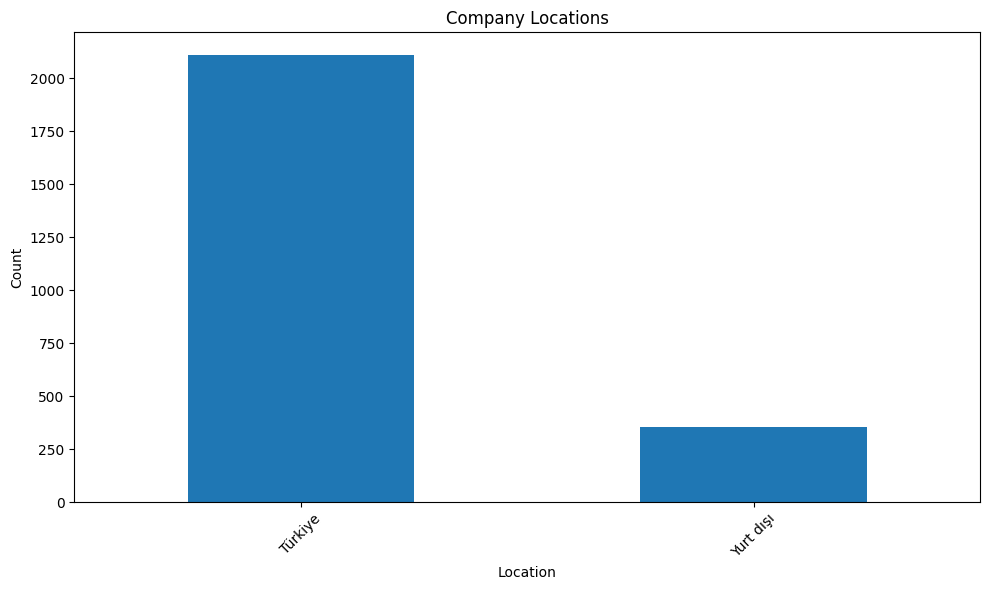

In [4]:
# Replace 'Şirketiniz hangi lokasyon merkezli?' with the exact column name from your data
location_counts = df['Şirketiniz hangi lokasyon merkezli?'].value_counts()

# Create a bar chart using matplotlib
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
location_counts.plot(kind='bar')
plt.title('Company Locations')
plt.xlabel('Location')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


In [5]:
dummies=df['Yan haklarınız'].str.split('\n', expand=True).stack().str.get_dummies().sum(level=0)

<ipython-input-5-bd5555eb9583>:1: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
  dummies=df['Yan haklarınız'].str.split('\n', expand=True).stack().str.get_dummies().sum(level=0)


In [6]:
dummies.replace({0: 'yok', 1: 'var'}, inplace=True)

In [7]:
df1 = pd.concat([df, dummies], axis=1)

In [8]:
df1.drop('Yan haklarınız',axis=1,inplace=True)
df1.head()

,Submission Date,Cinsiyet,Şirketiniz hangi lokasyon merkezli?,Şirketiniz hangi şehirde? (Eğer Türkiye ise),Çalışma şekliniz nedir?,Şirketinizin çalışan sayısı nedir?,Hangi pozisyonda çalışıyorsunuz?,Seviyeniz nedir?,Deneyim,Ağırlıklı olarak hangi teknolojileri / dilleri kullanıyorsunuz?,...,Spor salonu üyeliği / indirimi,Tamamlayıcı sağlık sigortası,Tıbbi izin,Yemek kartı,Yol / yakıt yardımı,Özel günlerce dhediye çeki,İşsizlik sigortası,İşçi tazminatı,Şirket aracı,Şirket telefonu
0,"Ağu 5, 2023",Erkek,Türkiye,34 İstanbul,Hybrid,601-1.000,DevOps,Senior,5-9 Yıl,"C# / .NET Framework\nCloud araçları ( AWS, Azu...",...,yok,var,yok,var,var,yok,yok,yok,yok,yok
1,"Ağu 5, 2023",Erkek,Türkiye,34 İstanbul,Remote,51-150,Fullstack Developer / Engineer,Junior,0-1 Yıl,Java ve bağlı framework'ler\nJavascript / Type...,...,yok,var,yok,var,yok,yok,yok,yok,yok,yok
2,"Ağu 5, 2023",Erkek,Türkiye,34 İstanbul,Ofiste,1.000-5.000,Diğer,Junior,0-1 Yıl,"ChatGPT\nCloud araçları ( AWS, Azure, GCP vs)\...",...,yok,yok,yok,var,yok,yok,yok,yok,yok,yok
3,"Ağu 5, 2023",Erkek,Türkiye,60 Tokat,Remote,1-50,Fullstack Developer / Engineer,Mid,3-5 Yıl,Javascript / Typescript ve bağlı framework'ler...,...,yok,yok,yok,yok,yok,yok,yok,yok,yok,yok
4,"Ağu 5, 2023",Kadın,Türkiye,16 Bursa,Hybrid,51-150,Backend Developer / Engineer,Senior,3-5 Yıl,C# / .NET Framework\nJavascript / Typescript v...,...,yok,yok,yok,var,yok,yok,yok,yok,yok,yok


In [9]:
dummy_1=df1['Ağırlıklı olarak hangi teknolojileri / dilleri kullanıyorsunuz?'].str.split('\n', expand=True).stack().str.get_dummies().sum(level=0)

<ipython-input-9-eeffa90f7ad7>:1: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
  dummy_1=df1['Ağırlıklı olarak hangi teknolojileri / dilleri kullanıyorsunuz?'].str.split('\n', expand=True).stack().str.get_dummies().sum(level=0)


In [10]:
column_name = 'Tech_Languages_Column'

# Split the values and create a DataFrame with value counts
values = df['Ağırlıklı olarak hangi teknolojileri / dilleri kullanıyorsunuz?'].str.split('\n', expand=True).stack()
value_counts = values.value_counts()


In [11]:
value_counts

Javascript / Typescript ve bağlı framework'ler             942
SQL                                                        870
Jira / Asana / Trello / Bitrix24 ve benzeri PM araçları    621
C# / .NET Framework                                        604
Java ve bağlı framework'ler                                551
Cloud araçları ( AWS, Azure, GCP vs)                       490
ChatGPT                                                    456
Python                                                     448
Linux                                                      443
DevOps araçları                                            435
Docker / containerd / Hyper-V / LXC / Podman               427
Microsoft Office Araçları                                  367
Kubernetes                                                 256
Figma / XD ve diğer tasarım araçları                       240
NoSQL                                                      239
PHP                                                    

In [12]:
dummy_1.replace({0: 'yok', 1: 'var'}, inplace=True)
df1 = pd.concat([df, dummy_1], axis=1)

i want to detect  there is  any correletaion between knowing  tech language count and salary

In [13]:
dummy_1.columns

Index(['Adobe CC araçları', 'C# / .NET Framework', 'C, C++', 'ChatGPT',
       'Cloud araçları ( AWS, Azure, GCP vs)', 'DevOps araçları',
       'Docker / containerd / Hyper-V / LXC / Podman',
       'Figma / XD ve diğer tasarım araçları', 'Flutter', 'Golang',
       'Java ve bağlı framework'ler',
       'Javascript / Typescript ve bağlı framework'ler',
       'Jira / Asana / Trello / Bitrix24 ve benzeri PM araçları', 'Kotlin',
       'Kubernetes', 'Linux', 'Microsoft Office Araçları',
       'No-code / Low-code Araçları', 'NoSQL', 'PHP', 'Python', 'R', 'Ruby',
       'Rust', 'SAP', 'SQL', 'Salesforce', 'Swift'],
      dtype='object')

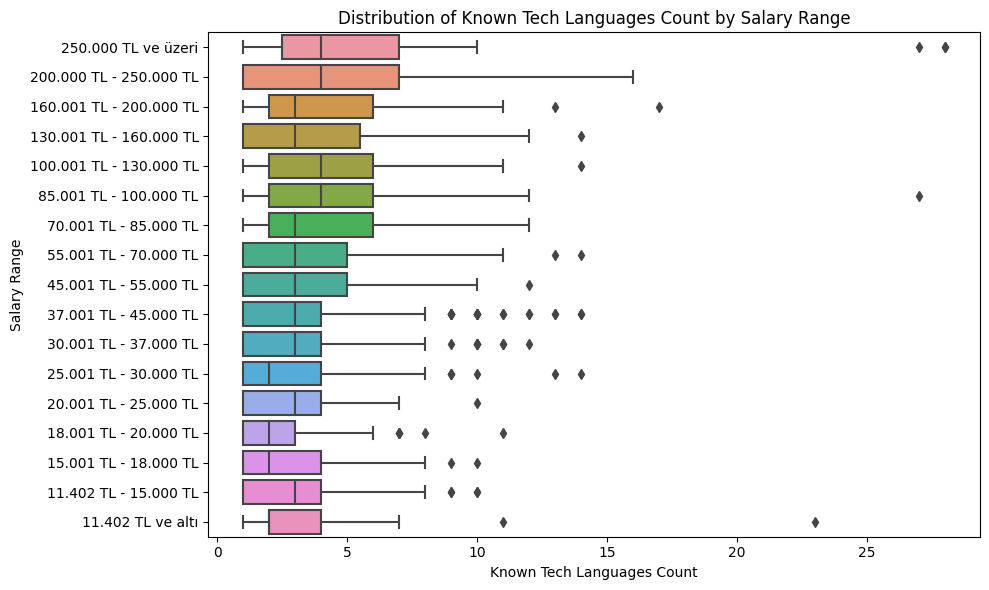

In [14]:

import matplotlib.pyplot as plt
import seaborn as sns


# Replace 'Tech_Languages_Column' with the actual column name from your df1
tech_columns = ['Adobe CC araçları', 'C# / .NET Framework', 'C, C++', 'ChatGPT',
               'Cloud araçları ( AWS, Azure, GCP vs)', 'DevOps araçları',
               'Docker / containerd / Hyper-V / LXC / Podman',
               'Figma / XD ve diğer tasarım araçları', 'Flutter', 'Golang',
               'Java ve bağlı framework\'ler',
               'Javascript / Typescript ve bağlı framework\'ler',
               'Jira / Asana / Trello / Bitrix24 ve benzeri PM araçları', 'Kotlin',
               'Kubernetes', 'Linux', 'Microsoft Office Araçları',
               'No-code / Low-code Araçları', 'NoSQL', 'PHP', 'Python', 'R', 'Ruby',
               'Rust', 'SAP', 'SQL', 'Salesforce', 'Swift']

# Count the occurrences of "var" (1) in each row
df1['Known_Tech_Count'] = df1[tech_columns].apply(lambda row: row.str.count('var')).sum(axis=1)

# Set the order of salary ranges in descending order
salary_order = [
    '250.000 TL ve üzeri',
    '200.000 TL - 250.000 TL',
    '160.001 TL - 200.000 TL',
    '130.001 TL - 160.000 TL',
    '100.001 TL - 130.000 TL',
    '85.001 TL - 100.000 TL',
    '70.001 TL - 85.000 TL',
    '55.001 TL - 70.000 TL',
    '45.001 TL - 55.000 TL',
    '37.001 TL - 45.000 TL',
    '30.001 TL - 37.000 TL',
    '25.001 TL - 30.000 TL',
    '20.001 TL - 25.000 TL',
    '18.001 TL - 20.000 TL',
    '15.001 TL - 18.000 TL',
    '11.402 TL - 15.000 TL',
    '11.402 TL ve altı'
]

# Create a prettier box plot using Seaborn
plt.figure(figsize=(10, 6))
sns.boxplot(data=df1, x='Known_Tech_Count', y='Maaş / Aylık Türk Lirası cinsinden', order=salary_order)
plt.title('Distribution of Known Tech Languages Count by Salary Range')
plt.xlabel('Known Tech Languages Count')
plt.ylabel('Salary Range')
plt.tight_layout()
plt.show()


In [15]:
df1['Maaş / Aylık Türk Lirası cinsinden'].value_counts()

30.001 TL - 37.000 TL      300
25.001 TL - 30.000 TL      261
37.001 TL - 45.000 TL      260
55.001 TL - 70.000 TL      258
45.001 TL - 55.000 TL      254
20.001 TL - 25.000 TL      248
70.001 TL - 85.000 TL      153
15.001 TL - 18.000 TL      112
11.402 TL - 15.000 TL      106
85.001 TL - 100.000 TL     105
18.001 TL - 20.000 TL      103
100.001 TL - 130.000 TL     86
11.402 TL ve altı           60
130.001 TL - 160.000 TL     59
250.000 TL ve üzeri         35
160.001 TL - 200.000 TL     34
200.000 TL - 250.000 TL     31
Name: Maaş / Aylık Türk Lirası cinsinden, dtype: int64

As i can see there is a small correlation between known tech counts and salary but not such a big thing

i will look at is there any correlation between work experience and salary

In [16]:
df1['Deneyim'].value_counts()

1-3 Yıl            838
3-5 Yıl            436
0-1 Yıl            408
5-9 Yıl            360
12 Yıl ve üzeri    227
9-12 Yıl           196
Name: Deneyim, dtype: int64

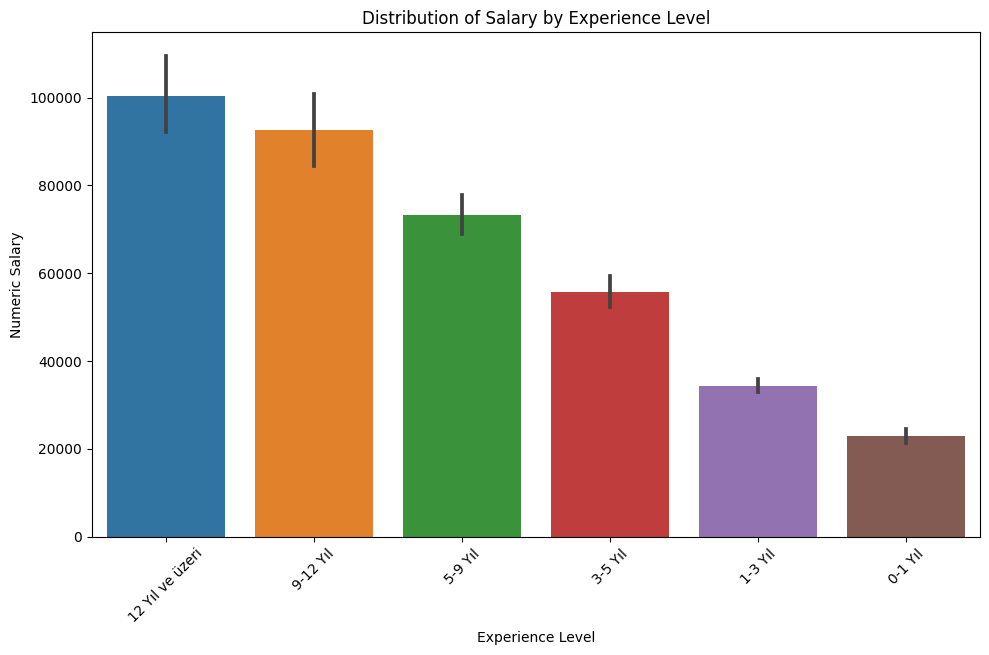

In [17]:


# Convert salary ranges to numeric values (midpoint of each range)
salary_mapping = {
    '11.402 TL ve altı': (0 + 11402) / 2,
    '11.402 TL - 15.000 TL': (11402 + 15000) / 2,
    '15.001 TL - 18.000 TL': (15001 + 18000) / 2,
    '18.001 TL - 20.000 TL': (18001 + 20000) / 2,
    '20.001 TL - 25.000 TL': (20001 + 25000) / 2,
    '25.001 TL - 30.000 TL': (25001 + 30000) / 2,
    '30.001 TL - 37.000 TL': (30001 + 37000) / 2,
    '37.001 TL - 45.000 TL': (37001 + 45000) / 2,
    '45.001 TL - 55.000 TL': (45001 + 55000) / 2,
    '55.001 TL - 70.000 TL': (55001 + 70000) / 2,
    '70.001 TL - 85.000 TL': (70001 + 85000) / 2,
    '85.001 TL - 100.000 TL': (85001 + 100000) / 2,
    '100.001 TL - 130.000 TL': (100001 + 130000) / 2,
    '130.001 TL - 160.000 TL': (130001 + 160000) / 2,
    '160.001 TL - 200.000 TL': (160001 + 200000) / 2,
    '200.000 TL - 250.000 TL': (200000 + 250000) / 2,
    '250.000 TL ve üzeri': 250000
}

df1['Mean_Salary'] = df1['Maaş / Aylık Türk Lirası cinsinden'].map(salary_mapping)

# Set the order of experience levels
experience_order = [
    '12 Yıl ve üzeri',
    '9-12 Yıl',
    '5-9 Yıl',
    '3-5 Yıl',
    '1-3 Yıl',
    '0-1 Yıl'
]

# Create a prettier box plot using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(data=df1, x='Deneyim', y='Mean_Salary', order=experience_order)
plt.title('Distribution of Salary by Experience Level')
plt.xlabel('Experience Level')
plt.ylabel('Numeric Salary')
plt.tight_layout()
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.show()

In [18]:
df1['Seviyeniz nedir?'].value_counts()

Junior    855
Mid       826
Senior    784
Name: Seviyeniz nedir?, dtype: int64

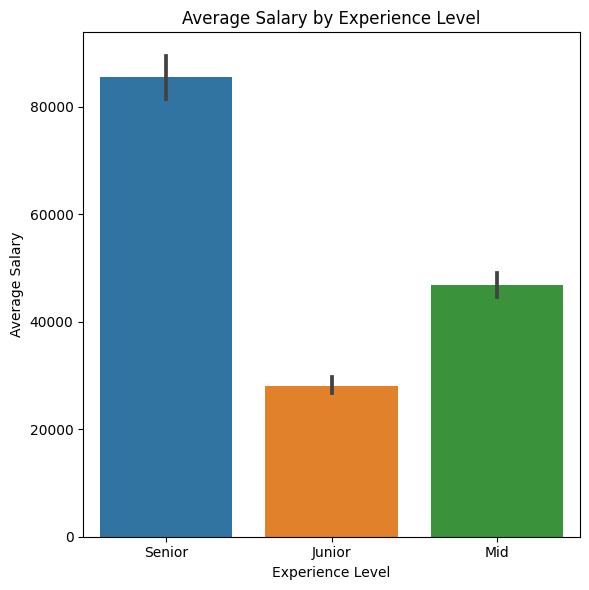

In [19]:
df1['Mean_Salary'] = df1['Maaş / Aylık Türk Lirası cinsinden'].map(salary_mapping)


# Create a basic bar chart for 'Seviyeniz nedir?'
plt.figure(figsize=(6, 6))
sns.barplot(data=df1, x='Seviyeniz nedir?', y='Mean_Salary')
plt.title('Average Salary by Experience Level')
plt.xlabel('Experience Level')
plt.ylabel('Average Salary')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [21]:
df1['Hangi pozisyonda çalışıyorsunuz?'].value_counts().head(50)

Backend Developer / Engineer         445
Fullstack Developer / Engineer       370
Frontend Developer / Engineer        280
Software Engineer                    217
Mobile Developer(Cross Platform)      64
iOS Developer                         62
Team Lead                             61
Diğer                                 57
Android Developer                     56
Business Analyst                      54
Q/A - Test Automation Engineer        52
DevOps                                48
AI - ML Developer / Engineer          46
Data Analyst                          44
Data Scientist                        43
Cyber Security Engineer               34
Embedded Developer / Engineer         32
System Administrator                  31
Product Manager                       31
Data Engineer                         30
Game Developer / Engineer             28
Intern                                27
Software Architect                    25
CTO (Chief Technology Officer)        24
Project Manager 

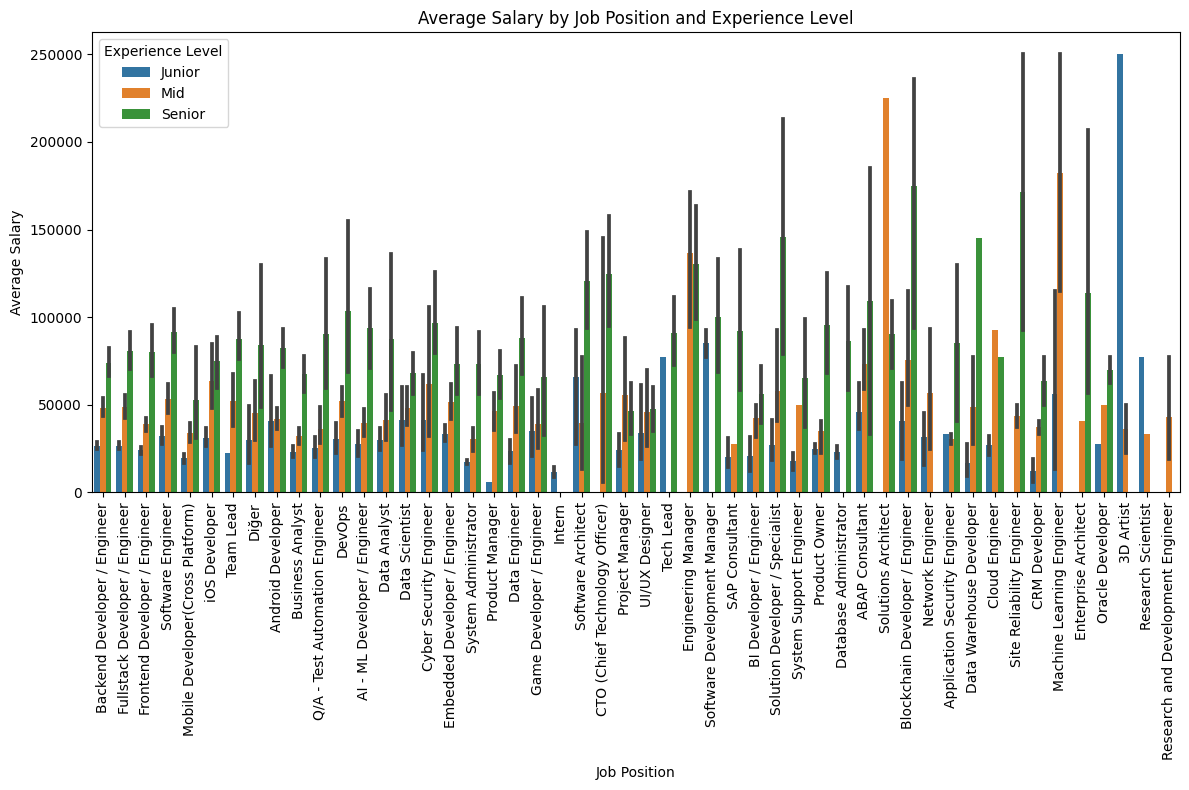

In [30]:


# Convert salary ranges to numeric values (mean of each range)
salary_mapping = {
    '11.402 TL ve altı': (0 + 11402) / 2,
    '11.402 TL - 15.000 TL': (11402 + 15000) / 2,
    '15.001 TL - 18.000 TL': (15001 + 18000) / 2,
    '18.001 TL - 20.000 TL': (18001 + 20000) / 2,
    '20.001 TL - 25.000 TL': (20001 + 25000) / 2,
    '25.001 TL - 30.000 TL': (25001 + 30000) / 2,
    '30.001 TL - 37.000 TL': (30001 + 37000) / 2,
    '37.001 TL - 45.000 TL': (37001 + 45000) / 2,
    '45.001 TL - 55.000 TL': (45001 + 55000) / 2,
    '55.001 TL - 70.000 TL': (55001 + 70000) / 2,
    '70.001 TL - 85.000 TL': (70001 + 85000) / 2,
    '85.001 TL - 100.000 TL': (85001 + 100000) / 2,
    '100.001 TL - 130.000 TL': (100001 + 130000) / 2,
    '130.001 TL - 160.000 TL': (130001 + 160000) / 2,
    '160.001 TL - 200.000 TL': (160001 + 200000) / 2,
    '200.000 TL - 250.000 TL': (200000 + 250000) / 2,
    '250.000 TL ve üzeri': 250000
}

df1['Mean_Salary'] = df1['Maaş / Aylık Türk Lirası cinsinden'].map(salary_mapping)

# Set the order of experience levels for 'Seviyeniz nedir?' column
level_order = [
    'Junior',
    'Mid',
    'Senior'
]

# Set the order of job positions for 'Hangi pozisyonda çalışıyorsunuz?' column
position_order = [
    'Backend Developer / Engineer',
    'Fullstack Developer / Engineer',
    'Frontend Developer / Engineer',
    'Software Engineer',
    'Mobile Developer(Cross Platform)',
    'iOS Developer',
    'Team Lead',
    'Diğer',
    'Android Developer',
    'Business Analyst',
    'Q/A - Test Automation Engineer',
    'DevOps',
    'AI - ML Developer / Engineer',
    'Data Analyst',
    'Data Scientist',
    'Cyber Security Engineer',
    'Embedded Developer / Engineer',
    'System Administrator',
    'Product Manager',
    'Data Engineer',
    'Game Developer / Engineer',
    'Intern',
    'Software Architect',
    'CTO (Chief Technology Officer)',
    'Project Manager',
    'UI/UX Designer',
    'Tech Lead',
    'Engineering Manager',
    'Software Development Manager',
    'SAP Consultant',
    'BI Developer / Engineer',
    'Solution Developer / Specialist',
    'System Support Engineer',
    'Product Owner',
    'Database Administrator',
    'ABAP Consultant',
    'Solutions Architect',
    'Blockchain Developer / Engineer',
    'Network Engineer',
    'Application Security Engineer',
    'Data Warehouse Developer',
    'Cloud Engineer',
    'Site Reliability Engineer',
    'CRM Developer',
    'Machine Learning Engineer',
    'Enterprise Architect',
    'Oracle Developer',
    '3D Artist',
    'Research Scientist',
    'Research and Development Engineer'
]

# Create a bar chart for average salary by job position and experience level (descending order)
plt.figure(figsize=(12, 8))
sns.barplot(data=df1, x='Hangi pozisyonda çalışıyorsunuz?', y='Mean_Salary',
            order=position_order, hue='Seviyeniz nedir?', hue_order=level_order)
plt.title('Average Salary by Job Position and Experience Level')
plt.xlabel('Job Position')
plt.ylabel('Average Salary')
plt.xticks(rotation=90)
plt.legend(title='Experience Level')
plt.tight_layout()
plt.show()


meh not bad but it looking too seems a little hard to understand



instead of doing bar

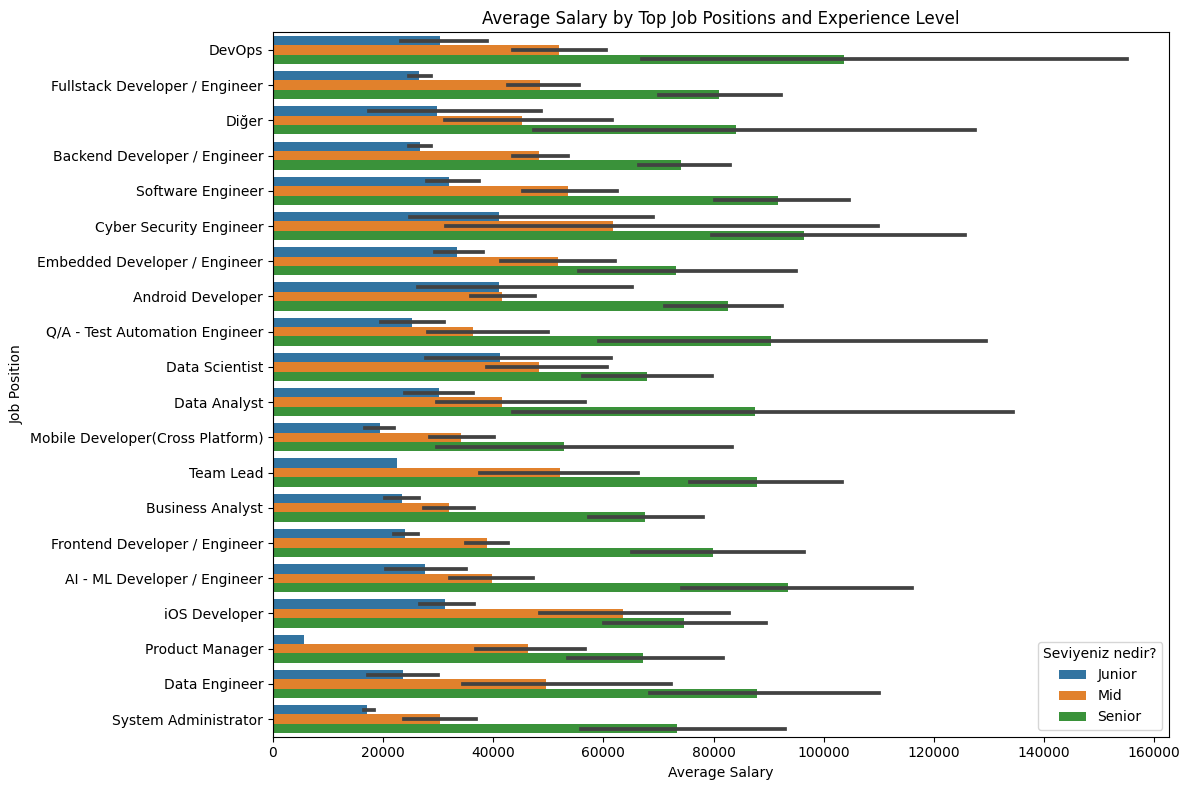

In [28]:


# Convert salary ranges to numeric values (mean of each range)
salary_mapping = {
    '11.402 TL ve altı': (0 + 11402) / 2,
    '11.402 TL - 15.000 TL': (11402 + 15000) / 2,
    '15.001 TL - 18.000 TL': (15001 + 18000) / 2,
    '18.001 TL - 20.000 TL': (18001 + 20000) / 2,
    '20.001 TL - 25.000 TL': (20001 + 25000) / 2,
    '25.001 TL - 30.000 TL': (25001 + 30000) / 2,
    '30.001 TL - 37.000 TL': (30001 + 37000) / 2,
    '37.001 TL - 45.000 TL': (37001 + 45000) / 2,
    '45.001 TL - 55.000 TL': (45001 + 55000) / 2,
    '55.001 TL - 70.000 TL': (55001 + 70000) / 2,
    '70.001 TL - 85.000 TL': (70001 + 85000) / 2,
    '85.001 TL - 100.000 TL': (85001 + 100000) / 2,
    '100.001 TL - 130.000 TL': (100001 + 130000) / 2,
    '130.001 TL - 160.000 TL': (130001 + 160000) / 2,
    '160.001 TL - 200.000 TL': (160001 + 200000) / 2,
    '200.000 TL - 250.000 TL': (200000 + 250000) / 2,
    '250.000 TL ve üzeri': 250000
}

df1['Mean_Salary'] = df1['Maaş / Aylık Türk Lirası cinsinden'].map(salary_mapping)

# Select the top N job positions based on frequency
top_n_positions = 20
top_positions = df1['Hangi pozisyonda çalışıyorsunuz?'].value_counts().head(top_n_positions).index

# Create a subset DataFrame with only the top N job positions
subset_df = df1[df1['Hangi pozisyonda çalışıyorsunuz?'].isin(top_positions)]

# Create a bar chart for average salary by job position and experience level (descending order)
plt.figure(figsize=(12, 8))
sns.barplot(data=subset_df, x='Mean_Salary', y='Hangi pozisyonda çalışıyorsunuz?',
            hue='Seviyeniz nedir?', hue_order=level_order, orient='h')
plt.title('Average Salary by Top Job Positions and Experience Level')
plt.xlabel('Average Salary')
plt.ylabel('Job Position')
plt.tight_layout()
plt.show()


looking better but i think best way to represent it table is the best for this case

In [31]:


# Convert salary ranges to numeric values (mean of each range)
salary_mapping = {
    '11.402 TL ve altı': (0 + 11402) / 2,
    '11.402 TL - 15.000 TL': (11402 + 15000) / 2,
    '15.001 TL - 18.000 TL': (15001 + 18000) / 2,
    '18.001 TL - 20.000 TL': (18001 + 20000) / 2,
    '20.001 TL - 25.000 TL': (20001 + 25000) / 2,
    '25.001 TL - 30.000 TL': (25001 + 30000) / 2,
    '30.001 TL - 37.000 TL': (30001 + 37000) / 2,
    '37.001 TL - 45.000 TL': (37001 + 45000) / 2,
    '45.001 TL - 55.000 TL': (45001 + 55000) / 2,
    '55.001 TL - 70.000 TL': (55001 + 70000) / 2,
    '70.001 TL - 85.000 TL': (70001 + 85000) / 2,
    '85.001 TL - 100.000 TL': (85001 + 100000) / 2,
    '100.001 TL - 130.000 TL': (100001 + 130000) / 2,
    '130.001 TL - 160.000 TL': (130001 + 160000) / 2,
    '160.001 TL - 200.000 TL': (160001 + 200000) / 2,
    '200.000 TL - 250.000 TL': (200000 + 250000) / 2,
    '250.000 TL ve üzeri': 250000
}

df1['Mean_Salary'] = df1['Maaş / Aylık Türk Lirası cinsinden'].map(salary_mapping)

# Select the top job positions based on frequency
top_positions = df1['Hangi pozisyonda çalışıyorsunuz?'].value_counts().head(10).index

# Create a subset DataFrame with only the top job positions
subset_df = df1[df1['Hangi pozisyonda çalışıyorsunuz?'].isin(top_positions)]

# Group by job position and experience level, calculate average salary
grouped_df = subset_df.groupby(['Hangi pozisyonda çalışıyorsunuz?', 'Seviyeniz nedir?'])['Mean_Salary'].mean().reset_index()

# Pivot the table for better readability
pivot_table = grouped_df.pivot(index='Hangi pozisyonda çalışıyorsunuz?', columns='Seviyeniz nedir?', values='Mean_Salary')

# Sort the table by the 'Junior' column in descending order
pivot_table = pivot_table.sort_values(by='Junior', ascending=False)

# Display the table
print(pivot_table)


Seviyeniz nedir?                        Junior           Mid        Senior
Hangi pozisyonda çalışıyorsunuz?                                          
Android Developer                 41035.500000  41667.166667  82567.166667
Software Engineer                 31980.263514  53528.841667  91747.451807
iOS Developer                     31230.148148  63647.558824  74722.722222
Diğer                             29769.131579  45223.272727  84012.937500
Backend Developer / Engineer      26756.193750  48275.355346  74102.869048
Fullstack Developer / Engineer    26542.956954  48554.881579  80943.319048
Frontend Developer / Engineer     24044.222727  38825.309917  79918.826531
Business Analyst                  23353.157895  32053.131579  67500.500000
Team Lead                         22500.500000  52200.500000  87830.470000
Mobile Developer(Cross Platform)  19457.130435  34118.712121  52938.000000
